## Iris Species

This is a multiple classification problem, meaning that there are more than two classes to be predicted, in fact there are three flower species (Iris setosa, Iris virginica and Iris versicolor).

The data set consists of:
- 150 samples
- 3 labels: species of Iris (Iris setosa, Iris virginica and Iris versicolor)
- 4 features: Sepal length,Sepal width,Petal length,Petal Width in cm

General description and data are available on [Kaggle](https://www.kaggle.com/uciml/iris).

1. [Load Dataset](#1)

2. [Basic EDA](#2)

3. [Modeling](#3)

## <a name="1">Load Dataset</a>

In [1]:
import pandas as pd

In [2]:
iris=pd.read_csv("data/iris.csv")

In [8]:
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


Let's check if there is any inconsistency in the dataset.

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


There is no null values in the dataset, so the data can be processed.

Let's drop the unneeded column, inplace=True means the changes should be reflected into the dataframe.

In [71]:
iris.drop("Id",axis=1,inplace=True)

## <a name="2">Basic EDA</a>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

**Types of Species**

Let's see how many samples we have of each species.

In [3]:
iris["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
#sns.countplot("Species",data=iris).set_title("Iris Species Count")
#plt.show()

We can see that there are 50 samples each of all the Iris Species in the data set.

**Visualizing species based on Sepal length and width**

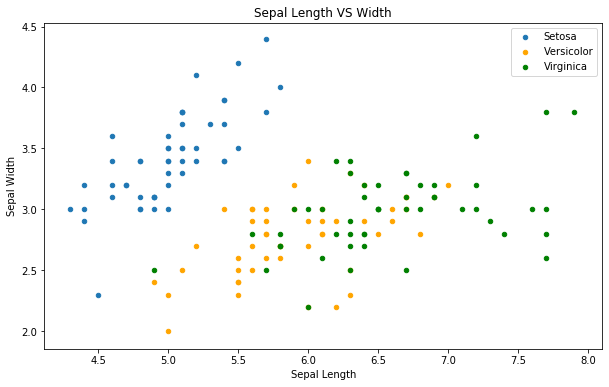

In [18]:
fig=iris[iris["Species"]=="Iris-setosa"].plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm",label="Setosa")
iris[iris["Species"]=="Iris-versicolor"].plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm",label="Versicolor",color="orange",ax=fig)
iris[iris["Species"]=="Iris-virginica"].plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm",label="Virginica",color="green",ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

We can easily differentiate setosa based on Sepal but for versicolor and virginica its difficult because the data is scattered.

**Visualizing species based on Petal length and width**

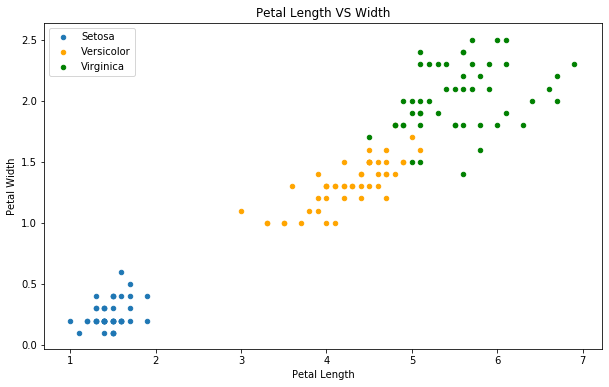

In [20]:
fig=iris[iris["Species"]=="Iris-setosa"].plot(kind="scatter",x="PetalLengthCm",y="PetalWidthCm",label="Setosa")
iris[iris["Species"]=="Iris-versicolor"].plot(kind="scatter",x="PetalLengthCm",y="PetalWidthCm",label="Versicolor",color="orange",ax=fig)
iris[iris["Species"]=="Iris-virginica"].plot(kind="scatter",x="PetalLengthCm",y="PetalWidthCm",label="Virginica",color="green",ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Again based on petal we can easily classify setosa and for versicolor and virginica also we can classify but there is a thin line which should be taken care of.

**Let's see how the length and width are distributed**

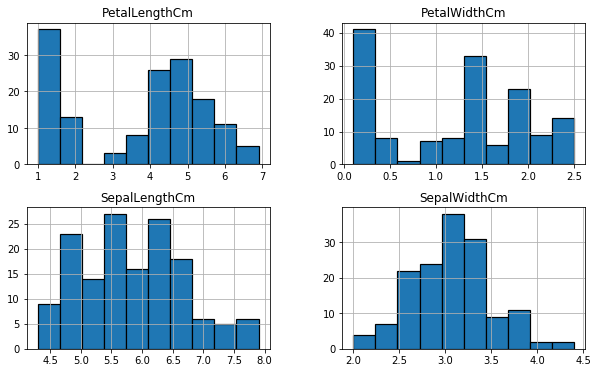

In [33]:
iris.hist(edgecolor="black",linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

**Let's see how the length and width vary according to the species**

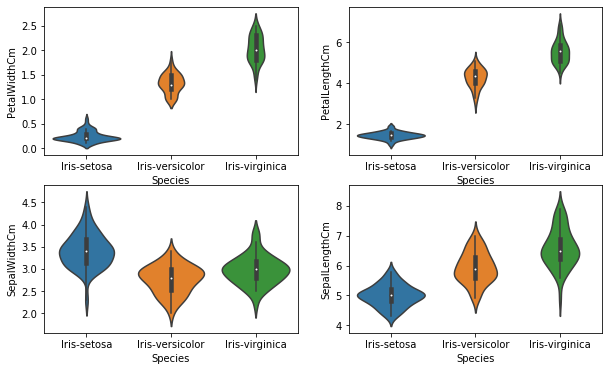

In [34]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.violinplot(x="Species",y="PetalWidthCm",data=iris)
plt.subplot(2,2,2)
sns.violinplot(x="Species",y="PetalLengthCm",data=iris)
plt.subplot(2,2,3)
sns.violinplot(x="Species",y="SepalWidthCm",data=iris)
plt.subplot(2,2,4)
sns.violinplot(x="Species",y="SepalLengthCm",data=iris)
plt.show()

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density.

## <a name="3">Modeling</a>

The given problem is a classification problem. Thus we will use classification algorithms to build a model.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [44]:
print(iris.shape)

(150, 5)


When we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the features will reduce the accuracy. Thus features selection should be done carefully. Let's see the correlation matrix.

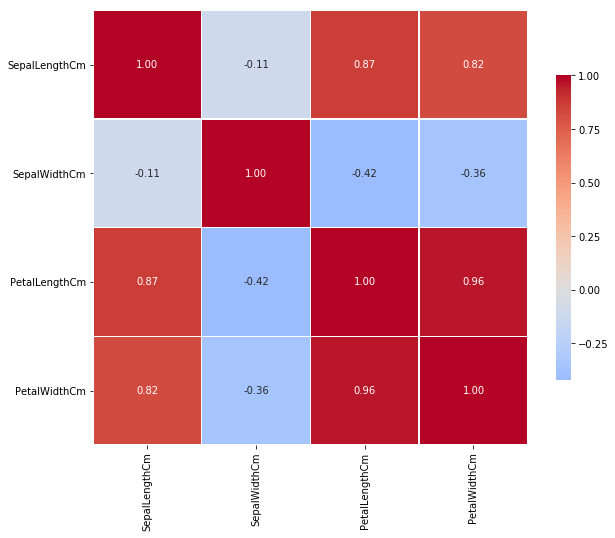

In [16]:
def correlation_heatmap(dataframe):
    correlations=dataframe.corr()
    sns.heatmap(correlations,vmax=1.0,center=0,fmt=".2f",square=True,linewidths=.5,annot=True,cmap="coolwarm",\
               cbar_kws={"shrink":.70})
    fig=plt.gcf()
    fig.set_size_inches(10,8)
    plt.show()

correlation_heatmap(iris)

**Observations**:
- Sepal Width and Sepal Length are not correlated
- Petal Width and Petal Length are highly correlated

Let's use all the features for training the algorithm and check the accuracy.

**Steps to be followed when applying an algorithm**:
1. Split the dataset into training set and test set;
2. Select any algorithm based on the problem (classification or regression) whatever you feel may be good;
3. Then pass the training set to the algorithm to train it;
4. Then pass the test set to the trained algorithm to predict the outcome;
5. We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [111]:
X=iris.drop("Species",axis=1)
#y=iris.Species
y=iris["Species"]

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [26]:
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

In [113]:
clf=svm.SVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("The accuracy of the SVM is {}".format(accuracy_score(y_test,y_pred)))

The accuracy of the SVM is 1.0


C:\Users\ELAYATHAMBA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM is giving very good accuracy. We will continue to check the accuracy for different models.

In [114]:
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("The accuracy of the knn is {}".format(accuracy_score(y_test,y_pred)))

The accuracy of the knn is 0.9555555555555556


Let's check the accuracy for various values of n for k-nearest neighbors.

In [ ]:
"""a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    a=a.append(pd.Series(accuracy_score(y_test,y_pred)))
plt.plot(list(range(1,11)),a)
plt.xticks(x)"""

We used all the features of iris in above models. Now we will use Petals and Sepals separately.

In [101]:
petal=iris[["PetalLengthCm","PetalWidthCm","Species"]]
sepal=iris[["SepalLengthCm","SepalWidthCm","Species"]]

In [102]:
X_p=petal.drop("Species",axis=1)
y_p=petal.Species
X_p_train,X_p_test,y_p_train,y_p_test=train_test_split(X_p,y_p,test_size=0.3,random_state=0)

X_s=sepal.drop("Species",axis=1)
y_s=sepal.Species
X_s_train,X_s_test,y_s_train,y_s_test=train_test_split(X_s,y_s,test_size=0.3,random_state=0)

In [103]:
clf=svm.SVC()
clf.fit(X_p_train,y_p_train)
y_p_pred=clf.predict(X_p_test)
print("The accuracy of the SVM using Petals is {}".format(accuracy_score(y_p_test,y_p_pred)))

clf=svm.SVC()
clf.fit(X_s_train,y_s_train)
y_s_pred=clf.predict(X_s_test)
print("The accuracy of the SVM using Sepals is {}".format(accuracy_score(y_s_test,y_s_pred)))

The accuracy of the SVM using Petals is 0.9777777777777777
The accuracy of the SVM using Sepals is 0.8


C:\Users\ELAYATHAMBA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ELAYATHAMBA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [104]:
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_p_train,y_p_train)
y_p_pred=clf.predict(X_p_test)
print("The accuracy of the knn using Petals is {}".format(accuracy_score(y_p_test,y_p_pred)))

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_s_train,y_s_train)
y_s_pred=clf.predict(X_s_test)
print("The accuracy of the knn using Sepals is {}".format(accuracy_score(y_s_test,y_s_pred)))

The accuracy of the knn using Petals is 0.9777777777777777
The accuracy of the knn using Sepals is 0.7333333333333333


**Observations**:
- Using Petals over Sepals for training the data gives a much better accuracy
- This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Sepal Length was very low whereas the correlation between Petal Length and Width was very high